Dynamic Programing   动态规划：切分问题

In [1]:
original_price = [1, 5, 8, 9, 10, 17, 17, 20, 24, 30]

In [2]:
from collections import defaultdict

In [3]:
price = defaultdict(int)

In [4]:
defaultdict?

In [5]:
for i, p in enumerate(original_price):
    price[i+1] = p

In [6]:
assert price[1] == 1

In [10]:
price[132]

0

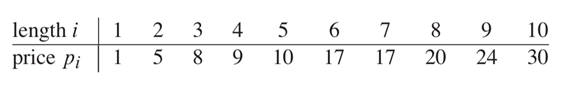

In [11]:
def r1(n):
    return max(
        [price[n]] + [r1(i) + r1(n-i) for i in range(1,n)]   #时间复杂度大，没有解决方案，r(4) 为什么是10
    )
        

In [12]:
r1(4)

10

In [13]:
solution = {}
## for a given length N, we set the corrsponding split parts
## solution = 
# {
#     4: (2, 2)
# }

In [14]:
def r(n):
    max_price, split_point = max(
        [(price[n],0)] + [(r(i) + r(n-i),i) for i in range(1,n)],key=lambda x:x[0]
    )
    solution[n] = (split_point, n - split_point)
    return max_price
      

In [15]:
r(4)

10

In [16]:
solution

{1: (0, 1), 2: (0, 2), 3: (0, 3), 4: (2, 2)}

In [17]:
solution[4]

(2, 2)

In [18]:
r(15)

43

In [19]:
solution

{1: (0, 1),
 2: (0, 2),
 3: (0, 3),
 4: (2, 2),
 5: (2, 3),
 6: (0, 6),
 7: (1, 6),
 8: (2, 6),
 9: (3, 6),
 10: (0, 10),
 11: (1, 10),
 12: (2, 10),
 13: (3, 10),
 14: (2, 12),
 15: (2, 13)}

In [20]:
from functools import lru_cache

In [21]:
@lru_cache(maxsize=2**10)
def r(n):
    max_price, split_point = max(
        [(price[n],0)] + [(r(i) + r(n-i),i) for i in range(1,n)],key=lambda x:x[0]
    )
    solution[n] = (split_point, n - split_point)
    return max_price 

In [22]:
r(125)

373

In [23]:
def func_1(n):
    start = time.time()
    for i in range(n):
        print(n)
    print('used time: {}'.format(time.time()-start))

In [24]:
import time

In [25]:
def func_slow(n):
    start = time.time()
    for i in range(n):
        time.sleep(0.2)
        print(n)
    print('used time: {}'.format(time.time() - start))

In [26]:
func_slow(5)

5
5
5
5
5
used time: 1.0020573139190674


In [27]:
def call_time(func_1, arg): # 脚手架程序 
    start = time.time()  
    func_1(arg)
    print('used time: {}'.format(time.time() - start))

In [28]:
call_time(func_slow, 10)

10
10
10
10
10
10
10
10
10
10
used time: 2.0031144618988037
used time: 2.0031144618988037


In [29]:
def get_call_time(func):   #返回一个新的函数inner
    def _inner(arg):    #inner函数接收一个参数传给func
        start = time.time()
        result = func(arg)
        print('used time: {}'.format(time.time()-start))
        return result
    return _inner

In [30]:
func_1_could_get_called_time = get_call_time(func_1)

In [31]:
func_1_could_get_called_time.__name__

'_inner'

In [28]:
func_1_could_get_called_time(10)

10
10
10
10
10
10
10
10
10
10
used time: 0.0009999275207519531
used time: 0.0009999275207519531


In [32]:
#简化一下
func_1 = get_call_time(func_1)   #==>@(decorator装饰器)  @get_call_time

In [33]:
func_1(10)  #得到一个新的func_1 

10
10
10
10
10
10
10
10
10
10
used time: 0.0009999275207519531
used time: 0.0009999275207519531


In [34]:
@get_call_time
def func_1(n):
    for i in range(n):
        print(n)

In [35]:
func_1(10)

10
10
10
10
10
10
10
10
10
10
used time: 0.0


In [36]:
@get_call_time  #只需加一行,如果要修改，只需修改这一个函数即可
def func_slow(n):
    for i in range(n):
        time.sleep(0.2)
        print(n)

In [37]:
func_slow(10)

10
10
10
10
10
10
10
10
10
10
used time: 2.0031144618988037


In [38]:
from functools import wraps

In [45]:
function_called_time = defaultdict(int)

def get_call_time(func):
    def _inner(arg): ## *args, **kwargs
        """It's inner function"""
        global function_called_time
        function_called_time[func.__name__] += 1
        result = func(arg)
        print('function called time is : {}'.format(function_called_time[func.__name__]))
        return result
    return _inner

In [46]:
@get_call_time  
def func_slow(n):
    for i in range(n):
        time.sleep(0.2)
        print(n)

In [47]:
func_slow(2)

2
2
function called time is : 1


In [48]:
@get_call_time
def func_1(n):
    """
    @param n: is the number of customers
    @return int: the customers value point
    """
    for i in range(n):
        print(n)
    return 0

In [49]:
func_1 = get_call_time(func_1)

In [50]:
help(func_1)   #   需引入@wraps(func)

Help on function _inner in module __main__:

_inner(arg)
    It's inner function



In [51]:
function_called_time = defaultdict(int)

def get_call_time(func):
    @wraps(func)
    def _inner(arg): ## *args, **kwargs
        """It's inner function"""
        global function_called_time
        function_called_time[func.__name__] += 1
        result = func(arg)
        print('function called time is : {}'.format(function_called_time[func.__name__]))
        return result
    return _inner

In [45]:
@get_call_time
def func_1(n):
    """
    @param n: is the number of customers
    @return int: the customers value point
    """
    for i in range(n):
        print(n)
    return 0

NameError: name 'wraps' is not defined

In [40]:
help(func_1)

Help on function _inner in module __main__:

_inner(arg)
    It's inner function



In [114]:
def memo(func):
    cache = {}
    @wraps(func)
    def _wrap(n): ## ? *args, **kwargs
        if n in cache: result = cache[n]
        else:
            result = func(n)
            cache[n] = result
        return result 
    return _wrap

In [115]:
@memo
def r(n):
    max_price, split_point = max(
        [(price[n], 0)] + [(r(i) + r(n-i), i) for i in range(1, n)], key=lambda x: x[0]
    )
    solution[n] = (split_point, n - split_point)
    
    return max_price

In [123]:
r(18)

52

Dynamic Programing  不断查表的意思
1分析子问题的重复  2子问题存储  3solution要进行分析 ---递归的方法

In [117]:
solution[18]

(2, 16)

In [118]:
solution[2]

(0, 2)

In [119]:
solution[16]

(6, 10)

In [121]:
solution[6]

(0, 6)

In [122]:
solution[10]

(0, 10)

In [136]:
def not_cut(split): return split == 0            

def parse_solution(target_length, revenue_solution):
    left, right = revenue_solution[target_length]
#     print(left,right)
    if not_cut(left): return [right]           #如果左侧不能切割，右侧直接返回，left是在price里的。函数的出口
    
#     return [left] + parse_solution(right,revenue_solution)
    return parse_solution(left, revenue_solution) + parse_solution(right, revenue_solution)

In [138]:
parse_solution(19, solution)

[3, 6, 10]

Edit Distance  编辑距离

In [ ]:
字符串之间变化，如果变化少，则这两个字符串越接近，否则不接近
插入、删除、替换

In [139]:
solution = {}

In [140]:
@lru_cache(maxsize=2**10)
def edit_distance(string1, string2):
    
    if len(string1) == 0: return len(string2)
    if len(string2) == 0: return len(string1)
    
    tail_s1 = string1[-1]
    tail_s2 = string2[-1]
    
    candidates = [
        (edit_distance(string1[:-1], string2) + 1, 'DEL {}'.format(tail_s1)),  # string 1 delete tail
        (edit_distance(string1, string2[:-1]) + 1, 'ADD {}'.format(tail_s2)),  # string 1 add tail of string2
    ]
    
    if tail_s1 == tail_s2:
        both_forward = (edit_distance(string1[:-1], string2[:-1]) + 0, '')
    else:
        both_forward = (edit_distance(string1[:-1], string2[:-1]) + 1, 'SUB {} => {}'.format(tail_s1, tail_s2))

    candidates.append(both_forward)
    
    min_distance, operation = min(candidates, key=lambda x: x[0])
    
    solution[(string1, string2)] = operation 
    
    return min_distance

In [141]:
edit_distance('ABCDE', 'ABCCEF')

2

In [142]:
solution

{('A', 'A'): '',
 ('A', 'AB'): 'ADD B',
 ('A', 'ABC'): 'ADD C',
 ('A', 'ABCC'): 'ADD C',
 ('A', 'ABCCE'): 'ADD E',
 ('A', 'ABCCEF'): 'ADD F',
 ('AB', 'A'): 'DEL B',
 ('AB', 'AB'): '',
 ('AB', 'ABC'): 'ADD C',
 ('AB', 'ABCC'): 'ADD C',
 ('AB', 'ABCCE'): 'ADD E',
 ('AB', 'ABCCEF'): 'ADD F',
 ('ABC', 'A'): 'DEL C',
 ('ABC', 'AB'): 'DEL C',
 ('ABC', 'ABC'): '',
 ('ABC', 'ABCC'): 'ADD C',
 ('ABC', 'ABCCE'): 'ADD E',
 ('ABC', 'ABCCEF'): 'ADD F',
 ('ABCD', 'A'): 'DEL D',
 ('ABCD', 'AB'): 'DEL D',
 ('ABCD', 'ABC'): 'DEL D',
 ('ABCD', 'ABCC'): 'SUB D => C',
 ('ABCD', 'ABCCE'): 'ADD E',
 ('ABCD', 'ABCCEF'): 'ADD F',
 ('ABCDE', 'A'): 'DEL E',
 ('ABCDE', 'AB'): 'DEL E',
 ('ABCDE', 'ABC'): 'DEL E',
 ('ABCDE', 'ABCC'): 'DEL E',
 ('ABCDE', 'ABCCE'): '',
 ('ABCDE', 'ABCCEF'): 'ADD F'}

In [144]:
edit_distance('ATCGGAA', 'ATCGGGA')

1